<h4><center>Parity Risk Strategies on a variety Portfolio (Bonds, Equity, and Commodities)</center></h4>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df = pd.read_csv('Bond_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df.head()

(48, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2004,100.02,105.10,100.98,100.92,104.87,100.66
1,2/1/2004,101.31,107.39,100.23,102.02,106.25,100.66
2,3/1/2004,102.45,107.20,101.30,102.13,106.75,98.78
3,4/1/2004,100.28,103.94,96.17,100.19,103.81,99.74
4,5/1/2004,99.43,104.58,101.25,98.86,103.52,99.83


In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       48 non-null     object 
 1   Germany    48 non-null     float64
 2   Australia  48 non-null     float64
 3   US         48 non-null     float64
 4   UK         48 non-null     float64
 5   Canada     48 non-null     float64
 6   Japan      48 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df['Date'] = pd.to_datetime(bond_df.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       48 non-null     datetime64[ns]
 1   Germany    48 non-null     float64       
 2   Australia  48 non-null     float64       
 3   US         48 non-null     float64       
 4   UK         48 non-null     float64       
 5   Canada     48 non-null     float64       
 6   Japan      48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [8]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df = bond_df[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.012897,0.021789,-0.007427,0.010900,0.013159,0.000000
2004-03-01,0.011253,-0.001769,0.010675,0.001078,0.004706,-0.018677
2004-04-01,-0.021181,-0.030410,-0.050642,-0.018995,-0.027541,0.009719
2004-05-01,-0.008476,0.006157,0.052823,-0.013275,-0.002794,0.000902
2004-06-01,-0.002917,-0.002008,0.000593,0.004248,-0.011206,-0.013122
2004-07-01,0.007061,0.000287,0.008489,0.000504,0.007229,0.010759
2004-08-01,0.015525,0.008333,-0.010864,0.013893,-0.002231,0.035449
2004-09-01,0.008383,0.004750,-0.000396,0.006454,0.003402,-0.014451


In [9]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df.dropna(axis=0, inplace=True)
bond_df

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2004-02-01,0.012897,0.021789,-0.007427,0.010900,0.013159,0.000000
2004-03-01,0.011253,-0.001769,0.010675,0.001078,0.004706,-0.018677
2004-04-01,-0.021181,-0.030410,-0.050642,-0.018995,-0.027541,0.009719
2004-05-01,-0.008476,0.006157,0.052823,-0.013275,-0.002794,0.000902
2004-06-01,-0.002917,-0.002008,0.000593,0.004248,-0.011206,-0.013122
2004-07-01,0.007061,0.000287,0.008489,0.000504,0.007229,0.010759
2004-08-01,0.015525,0.008333,-0.010864,0.013893,-0.002231,0.035449
2004-09-01,0.008383,0.004750,-0.000396,0.006454,0.003402,-0.014451
2004-10-01,0.008118,0.010494,0.008018,0.007301,0.007072,-0.014662


In [10]:
print('There are {} rows in the DataFrame'.format(bond_df.shape[0]))

There are 47 rows in the DataFrame


In [11]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2 = bond_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (Bond_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus one month equal 47 months.

In [12]:
volatility_df = bond_df

In [13]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

volatility_df['Germany_Vol'] = volatility_df['Germany'].rolling(47).std() * math.sqrt(47)
volatility_df['Australia_Vol'] = volatility_df['Australia'].rolling(47).std() * math.sqrt(47)
volatility_df['US_Vol'] = volatility_df['US'].rolling(47).std() * math.sqrt(47)
volatility_df['UK_Vol'] = volatility_df['UK'].rolling(47).std() * math.sqrt(47)
volatility_df['Canada_Vol'] = volatility_df['Canada'].rolling(47).std() * math.sqrt(47)
volatility_df['Japan_Vol'] = volatility_df['Japan'].rolling(47).std() * math.sqrt(47)

In [14]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
volatility_df.dropna(axis=0, inplace=True)

In [15]:
volatility_df[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

,Germany_Vol,Australia_Vol,US_Vol,UK_Vol,Canada_Vol,Japan_Vol
Date,,,,,,
2007-12-01,0.113803,0.095646,0.14365,0.622277,0.088115,0.099797


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [16]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.113803 + 0.095646 + 0.14365 + 0.622277 + 0.088115 + 0.099797) / 6
volatility

0.19388133333333332

In [17]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol = 0.19388133333333332 / 6
target_vol

0.032313555555555554

In [18]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_df = bond_df

In [19]:
portfolio_df['Germany_Alloc'] = target_vol / volatility_df['Germany_Vol'] 
portfolio_df['Australia_Alloc'] = target_vol / volatility_df['Australia_Vol'] 
portfolio_df['US_Alloc'] = target_vol / volatility_df['US_Vol']
portfolio_df['UK_Alloc'] = target_vol / volatility_df['UK_Vol']
portfolio_df['Canada_Alloc'] = target_vol / volatility_df['Canada_Vol']
portfolio_df['Japan_Alloc'] = target_vol / volatility_df['Japan_Vol']

In [20]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_df.dropna(axis=0, inplace=True)

In [21]:
portfolio_df[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

,Germany_Alloc,Australia_Alloc,US_Alloc,UK_Alloc,Canada_Alloc,Japan_Alloc
Date,,,,,,
2007-12-01,0.283943,0.337846,0.224947,0.051928,0.366721,0.323791


In [22]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [23]:
bond_df_2['Germany_R'] = bond_df_2['Germany'] * 0.283943
bond_df_2['Australia_R'] = bond_df_2['Australia'] * 0.337846
bond_df_2['US_R'] = bond_df_2['US'] * 0.224947
bond_df_2['UK_R'] = bond_df_2['UK'] * 0.051928
bond_df_2['Canada_R'] = bond_df_2['Canada'] * 0.366721
bond_df_2['Japan_R'] = bond_df_2['Japan'] * 0.323791

In [24]:
bond_df_2

,Germany,Australia,US,UK,Canada,Japan,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R
Date,,,,,,,,,,,,
2004-02-01,0.012897,0.021789,-0.007427,0.010900,0.013159,0.000000,0.003662,0.007361,-0.001671,0.000566,0.004826,0.000000
2004-03-01,0.011253,-0.001769,0.010675,0.001078,0.004706,-0.018677,0.003195,-0.000598,0.002401,0.000056,0.001726,-0.006047
2004-04-01,-0.021181,-0.030410,-0.050642,-0.018995,-0.027541,0.009719,-0.006014,-0.010274,-0.011392,-0.000986,-0.010100,0.003147
2004-05-01,-0.008476,0.006157,0.052823,-0.013275,-0.002794,0.000902,-0.002407,0.002080,0.011882,-0.000689,-0.001024,0.000292
2004-06-01,-0.002917,-0.002008,0.000593,0.004248,-0.011206,-0.013122,-0.000828,-0.000678,0.000133,0.000221,-0.004109,-0.004249
2004-07-01,0.007061,0.000287,0.008489,0.000504,0.007229,0.010759,0.002005,0.000097,0.001910,0.000026,0.002651,0.003484
2004-08-01,0.015525,0.008333,-0.010864,0.013893,-0.002231,0.035449,0.004408,0.002815,-0.002444,0.000721,-0.000818,0.011478
2004-09-01,0.008383,0.004750,-0.000396,0.006454,0.003402,-0.014451,0.002380,0.001605,-0.000089,0.000335,0.001248,-0.004679
2004-10-01,0.008118,0.010494,0.008018,0.007301,0.007072,-0.014662,0.002305,0.003546,0.001804,0.000379,0.002594,-0.004748


In [25]:
# Adding up all the returns of all asset classes for all countries

In [26]:
bond_df_2['Portfolio_R'] = bond_df_2['Germany_R'] + bond_df_2['Australia_R'] + bond_df_2['US_R'] + bond_df_2['UK_R'] + bond_df_2['Canada_R'] + bond_df_2['Japan_R']

In [27]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [28]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2['Portfolio_Value'] = ((bond_df_2['Portfolio_R'] + 1).cumprod())*1000

In [29]:
bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Portfolio_Value']]

,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R,Portfolio_R,Portfolio_Value
Date,,,,,,,,
2004-02-01,0.003662,0.007361,-0.001671,0.000566,0.004826,0.000000,0.014744,1014.744390
2004-03-01,0.003195,-0.000598,0.002401,0.000056,0.001726,-0.006047,0.000733,1015.488346
2004-04-01,-0.006014,-0.010274,-0.011392,-0.000986,-0.010100,0.003147,-0.035619,979.317243
2004-05-01,-0.002407,0.002080,0.011882,-0.000689,-0.001024,0.000292,0.010134,989.241898
2004-06-01,-0.000828,-0.000678,0.000133,0.000221,-0.004109,-0.004249,-0.009511,979.833369
2004-07-01,0.002005,0.000097,0.001910,0.000026,0.002651,0.003484,0.010173,989.800769
2004-08-01,0.004408,0.002815,-0.002444,0.000721,-0.000818,0.011478,0.016161,1005.796985
2004-09-01,0.002380,0.001605,-0.000089,0.000335,0.001248,-0.004679,0.000800,1006.601576
2004-10-01,0.002305,0.003546,0.001804,0.000379,0.002594,-0.004748,0.005879,1012.519757


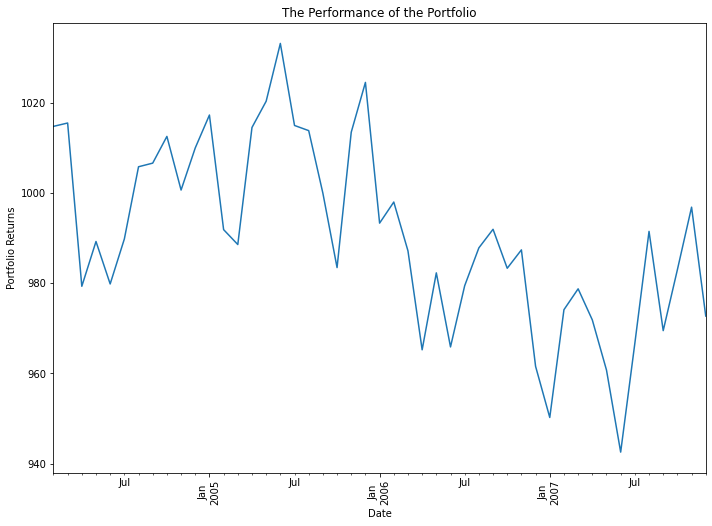

In [30]:
# Use matplotlib.figure() function to control the default spacing of the subplots and the top level container of the subplots,
# and the top level container for all plot elements.
plt.figure(figsize=[ 11.69, 8.27])

# Use matplotlib.pyplot.title() to set a title for the axes.
plt.title('The Performance of the Portfolio');

# Use matplotlib.pyplot.xlabel to set the label for the x-axis.
plt.xlabel('Date');

# Use matplotlib.pyplot.ylabel to set the label for the y-axis.
plt.ylabel('Portfolio Returns');

# Use matplotlip.pyplot.plot() function to plot y versus x as lines and /or markers
bond_df_2['Portfolio_Value'].plot()

plt.xticks(rotation=90);
# Use matplotlib.pyplot.show() function to display all figures. 
plt.show();

In [31]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2.Portfolio_Value.max() - bond_df_2.Portfolio_Value.min()) / bond_df_2.Portfolio_Value.max()

0.08763512049148023

In [32]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2['Portfolio_Value'][-1] / bond_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is -4.14%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [33]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2['Monthly_Return'] = bond_df_2['Portfolio_Value'].pct_change(1)

In [34]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2['Monthly_Return'].mean() / bond_df_2['Monthly_Return'].std()
Sharpe_Ratio

-0.046304959305176495

In [35]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-0.3174508072819164

In [36]:
# Calcualte the Sharpe Ratio
RF = .0164 # Risk Free Rate
Returns = bond_df_2['Monthly_Return']

Sharpe_Ratio = ((Returns.mean() - RF) / Returns.std())
Sharpe_Ratio

-1.0199785865216522

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.23 %.
- Maximum Drawdown 8.7%.
- Cumulative return of the o=portfolio -4.14%
- Sharpe Ratio - 4.6%.


In [37]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime

In [38]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df = pd.read_csv('Equity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df.head()

(48, 15)


,Date,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,Sweden,UK,Italy,Singapore
0,1/1/2004,3272.0,353.31,4058.60,8521.39,13289370117,3638439941,2383760010,1131130005,10783.61,7929.9,673.91,4390.68,103.48,3253.59
1,2/1/2004,3360.6,356.59,4018.16,8788.49,13907030273,3725439941,2483159912,1144939941,11041.92,8249.4,698.18,4492.21,107.12,3244.15
2,3/1/2004,3415.3,338.87,3856.70,8585.93,12681669922,3625229980,2380350098,1126209961,11715.39,8018.1,690.28,4385.67,110.94,3434.66
3,4/1/2004,3400.8,341.41,3985.21,8243.97,11942959961,3674280029,2439610107,1107300049,11761.79,8109.5,685.59,4489.69,106.04,3141.85
4,5/1/2004,3460.2,337.19,3921.41,8417.32,12198240234,3669629883,2415429932,1120680054,11236.37,7959.3,673.95,4430.69,109.46,3288.77


In [39]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        48 non-null     object 
 1   Australia   48 non-null     float64
 2   Nethelands  48 non-null     float64
 3   Germany     48 non-null     float64
 4   Canada      48 non-null     float64
 5   Hong_Kong   48 non-null     int64  
 6   France      48 non-null     int64  
 7   Belgium     48 non-null     int64  
 8   US          48 non-null     int64  
 9   Japan       48 non-null     float64
 10  Spain       48 non-null     float64
 11  Sweden      48 non-null     float64
 12  UK          48 non-null     float64
 13  Italy       48 non-null     float64
 14  Singapore   48 non-null     float64
dtypes: float64(10), int64(4), object(1)
memory usage: 5.8+ KB


In [40]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df['Date'] = pd.to_datetime(equity_df.Date)

In [41]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        48 non-null     datetime64[ns]
 1   Australia   48 non-null     float64       
 2   Nethelands  48 non-null     float64       
 3   Germany     48 non-null     float64       
 4   Canada      48 non-null     float64       
 5   Hong_Kong   48 non-null     int64         
 6   France      48 non-null     int64         
 7   Belgium     48 non-null     int64         
 8   US          48 non-null     int64         
 9   Japan       48 non-null     float64       
 10  Spain       48 non-null     float64       
 11  Sweden      48 non-null     float64       
 12  UK          48 non-null     float64       
 13  Italy       48 non-null     float64       
 14  Singapore   48 non-null     float64       
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 5.8 KB


In [42]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df.set_index('Date',inplace=True)

In [43]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df.isnull().any()

Australia     False
Nethelands    False
Germany       False
Canada        False
Hong_Kong     False
France        False
Belgium       False
US            False
Japan         False
Spain         False
Sweden        False
UK            False
Italy         False
Singapore     False
dtype: bool

In [44]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df = equity_df.rename(columns={'France ':'France'})
equity_df = equity_df.rename(columns={'Japan ':'Japan'})
equity_df = equity_df.rename(columns={'Sweden ':'Sweden'})

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [45]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df = equity_df[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                       'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change()
equity_df

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,Sweden,UK,Italy,Singapore
Date,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.027078,0.009284,-0.009964,0.031345,0.046478,0.023911,0.041699,0.012209,0.023954,0.040291,0.036014,0.023124,0.035176,-0.002901
2004-03-01,0.016277,-0.049693,-0.040183,-0.023048,-0.088111,-0.026899,-0.041403,-0.016359,0.060992,-0.028038,-0.011315,-0.023717,0.035661,0.058724
2004-04-01,-0.004246,0.007495,0.033321,-0.039828,-0.058250,0.013530,0.024896,-0.016791,0.003961,0.011399,-0.006794,0.023718,-0.044168,-0.085252
2004-05-01,0.017466,-0.012361,-0.016009,0.021027,0.021375,-0.001266,-0.009911,0.012083,-0.044672,-0.018521,-0.016978,-0.013141,0.032252,0.046762
2004-06-01,0.021010,0.023548,0.033488,0.015238,0.007174,0.017266,0.022865,0.017989,0.055400,0.014951,0.035878,0.007534,0.057098,0.138821
2004-07-01,0.000906,-0.044099,-0.038769,-0.010240,-0.003884,-0.023008,-0.002238,-0.034291,-0.044953,-0.019682,-0.021242,-0.011422,-0.039668,0.057923
2004-08-01,0.004694,-0.020581,-0.028340,-0.009581,0.050028,-0.014483,0.037706,0.002287,-0.021543,-0.006288,0.002532,0.010478,0.030598,0.013470
2004-09-01,0.031610,0.002538,0.028450,0.034769,0.020992,0.012890,0.052825,0.009364,-0.023301,0.020294,0.030261,0.024993,0.004104,0.059664


In [46]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df.dropna(axis=0, inplace=True)
equity_df

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,Sweden,UK,Italy,Singapore
Date,,,,,,,,,,,,,,
2004-02-01,0.027078,0.009284,-0.009964,0.031345,0.046478,0.023911,0.041699,0.012209,0.023954,0.040291,0.036014,0.023124,0.035176,-0.002901
2004-03-01,0.016277,-0.049693,-0.040183,-0.023048,-0.088111,-0.026899,-0.041403,-0.016359,0.060992,-0.028038,-0.011315,-0.023717,0.035661,0.058724
2004-04-01,-0.004246,0.007495,0.033321,-0.039828,-0.058250,0.013530,0.024896,-0.016791,0.003961,0.011399,-0.006794,0.023718,-0.044168,-0.085252
2004-05-01,0.017466,-0.012361,-0.016009,0.021027,0.021375,-0.001266,-0.009911,0.012083,-0.044672,-0.018521,-0.016978,-0.013141,0.032252,0.046762
2004-06-01,0.021010,0.023548,0.033488,0.015238,0.007174,0.017266,0.022865,0.017989,0.055400,0.014951,0.035878,0.007534,0.057098,0.138821
2004-07-01,0.000906,-0.044099,-0.038769,-0.010240,-0.003884,-0.023008,-0.002238,-0.034291,-0.044953,-0.019682,-0.021242,-0.011422,-0.039668,0.057923
2004-08-01,0.004694,-0.020581,-0.028340,-0.009581,0.050028,-0.014483,0.037706,0.002287,-0.021543,-0.006288,0.002532,0.010478,0.030598,0.013470
2004-09-01,0.031610,0.002538,0.028450,0.034769,0.020992,0.012890,0.052825,0.009364,-0.023301,0.020294,0.030261,0.024993,0.004104,0.059664
2004-10-01,0.030996,0.020189,0.017301,0.023382,-0.004982,0.018187,0.034249,0.014014,-0.004818,0.048461,-0.004548,0.011692,-0.040090,-0.054500


In [47]:
print('There are {} rows in the DataFrame'.format(equity_df.shape[0]))

There are 47 rows in the DataFrame


In [48]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2 = equity_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (equity_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus two months (null values) equal 46 months.

In [49]:
volatility_equity_df = equity_df

In [50]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

volatility_equity_df['Australia_Vol'] = volatility_equity_df['Australia'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Nethelands_Vol'] = volatility_equity_df['Nethelands'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Germany_Vol'] = volatility_equity_df['Germany'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Canada_Vol'] = volatility_equity_df['Canada'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Hong_Kong_Vol'] = volatility_equity_df['Hong_Kong'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['France_Vol'] = volatility_equity_df['France'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Belgium_Vol'] = volatility_equity_df['Belgium'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['US_Vol'] = volatility_equity_df['US'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Japan_Vol'] = volatility_equity_df['Japan'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Spain_Vol'] = volatility_equity_df['Spain'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Sweden_Vol'] = volatility_equity_df['Sweden'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['UK_Vol'] = volatility_equity_df['UK'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Italy_Vol'] = volatility_equity_df['Italy'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Singapore_Vol'] = volatility_equity_df['Singapore'].rolling(46).std() * math.sqrt(46)

In [51]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
volatility_equity_df.dropna(axis=0, inplace=True)

In [52]:
volatility_equity_df[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                      'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol','Singapore_Vol']]

,Australia_Vol,Nethelands_Vol,Germany_Vol,Canada_Vol,Hong_Kong_Vol,France_Vol,Belgium_Vol,US_Vol,Japan_Vol,Spain_Vol,Sweden_Vol,UK_Vol,Italy_Vol,Singapore_Vol
Date,,,,,,,,,,,,,,
2007-11-01,0.159626,0.218603,0.218120,0.199665,0.321088,0.183900,0.202774,0.150557,0.270797,0.216476,0.241703,0.151231,0.460971,0.316170
2007-12-01,0.165350,0.218738,0.216828,0.198555,0.323091,0.184409,0.201620,0.151137,0.272295,0.221105,0.242754,0.150565,0.462375,0.320087


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [53]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_volatility_equity = (0.159626 + 0.218603 + 0.218120 + 0.199665 + 0.321088 + 0.183900 + 0.202774 + 0.150557 + 0.270797 + 0.216476 + 0.241703 + 0.151231 + 0.460971 + 0.316170) / 14
Avg_volatility_equity

0.23654864285714283

In [54]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
equity_target_vol = 0.23654864285714283 / 14
equity_target_vol

0.01689633163265306

In [55]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_equity_df = bond_df

In [56]:
portfolio_equity_df['Australia_Alloc'] = equity_target_vol / volatility_equity_df['Australia_Vol'] 
portfolio_equity_df['Nethelands_Alloc'] = equity_target_vol / volatility_equity_df['Nethelands_Vol'] 
portfolio_equity_df['Germany_Alloc'] = equity_target_vol / volatility_equity_df['Germany_Vol'] 
portfolio_equity_df['Canada_Alloc'] = equity_target_vol / volatility_equity_df['Canada_Vol']
portfolio_equity_df['Hong_Kong_Alloc'] = equity_target_vol / volatility_equity_df['Hong_Kong_Vol']
portfolio_equity_df['France_Alloc'] = equity_target_vol / volatility_equity_df['France_Vol']
portfolio_equity_df['Belgium_Alloc'] = equity_target_vol / volatility_equity_df['Belgium_Vol']
portfolio_equity_df['US_Alloc'] = equity_target_vol / volatility_equity_df['US_Vol']
portfolio_equity_df['Japan_Alloc'] = equity_target_vol / volatility_equity_df['Japan_Vol']
portfolio_equity_df['Spain_Alloc'] = equity_target_vol / volatility_equity_df['Spain_Vol']
portfolio_equity_df['Sweden_Alloc'] = equity_target_vol / volatility_equity_df['Sweden_Vol']
portfolio_equity_df['UK_Alloc'] = equity_target_vol / volatility_equity_df['UK_Vol']
portfolio_equity_df['Italy_Alloc'] = equity_target_vol / volatility_equity_df['Italy_Vol']
portfolio_equity_df['Singapore_Alloc'] = equity_target_vol / volatility_equity_df['Singapore_Vol']

In [57]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_equity_df.dropna(axis=0, inplace=True)

In [58]:
portfolio_equity_df[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                     'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                     'UK_Alloc','Italy_Alloc','Singapore_Alloc']]

,Australia_Alloc,Nethelands_Alloc,Germany_Alloc,Canada_Alloc,Hong_Kong_Alloc,France_Alloc,Belgium_Alloc,US_Alloc,Japan_Alloc,Spain_Alloc,Sweden_Alloc,UK_Alloc,Italy_Alloc,Singapore_Alloc
Date,,,,,,,,,,,,,,
2007-12-01,0.102185,0.077245,0.077925,0.085096,0.052296,0.091624,0.083803,0.111795,0.062051,0.076418,0.069603,0.11222,0.036542,0.052787


In [59]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [60]:
equity_df_2['Australia_R'] = equity_df_2['Australia'] * 0.102185
equity_df_2['Nethelands_R'] = equity_df_2['Nethelands'] * 0.077245
equity_df_2['Germany_R'] = equity_df_2['Germany'] * 0.077925
equity_df_2['Canada_R'] = equity_df_2['Canada'] * 0.085096
equity_df_2['Hong_Kong_R'] = equity_df_2['Hong_Kong'] * 0.052296
equity_df_2['France_R'] = equity_df_2['France'] * 0.091624
equity_df_2['Belgium_R'] = equity_df_2['Belgium'] * 0.083803
equity_df_2['US_R'] = equity_df_2['US'] * 0.111795
equity_df_2['Japan_R'] = equity_df_2['Japan'] * 0.062051
equity_df_2['Spain_R'] = equity_df_2['Spain'] * 0.076418
equity_df_2['Sweden_R'] = equity_df_2['Sweden'] * 0.069603
equity_df_2['UK_R'] = equity_df_2['UK'] * 0.11222
equity_df_2['Italy_R'] = equity_df_2['Italy'] * 0.036542
equity_df_2['Singapore_R'] = equity_df_2['Singapore'] * 0.052787

In [61]:
equity_df_2

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Hong_Kong_R,France_R,Belgium_R,US_R,Japan_R,Spain_R,Sweden_R,UK_R,Italy_R,Singapore_R
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,0.027078,0.009284,-0.009964,0.031345,0.046478,0.023911,0.041699,0.012209,0.023954,0.040291,...,0.002431,0.002191,0.003494,0.001365,0.001486,0.003079,0.002507,0.002595,0.001285,-0.000153
2004-03-01,0.016277,-0.049693,-0.040183,-0.023048,-0.088111,-0.026899,-0.041403,-0.016359,0.060992,-0.028038,...,-0.004608,-0.002465,-0.003470,-0.001829,0.003785,-0.002143,-0.000788,-0.002661,0.001303,0.003100
2004-04-01,-0.004246,0.007495,0.033321,-0.039828,-0.058250,0.013530,0.024896,-0.016791,0.003961,0.011399,...,-0.003046,0.001240,0.002086,-0.001877,0.000246,0.000871,-0.000473,0.002662,-0.001614,-0.004500
2004-05-01,0.017466,-0.012361,-0.016009,0.021027,0.021375,-0.001266,-0.009911,0.012083,-0.044672,-0.018521,...,0.001118,-0.000116,-0.000831,0.001351,-0.002772,-0.001415,-0.001182,-0.001475,0.001179,0.002468
2004-06-01,0.021010,0.023548,0.033488,0.015238,0.007174,0.017266,0.022865,0.017989,0.055400,0.014951,...,0.000375,0.001582,0.001916,0.002011,0.003438,0.001143,0.002497,0.000845,0.002086,0.007328
2004-07-01,0.000906,-0.044099,-0.038769,-0.010240,-0.003884,-0.023008,-0.002238,-0.034291,-0.044953,-0.019682,...,-0.000203,-0.002108,-0.000188,-0.003834,-0.002789,-0.001504,-0.001479,-0.001282,-0.001450,0.003058
2004-08-01,0.004694,-0.020581,-0.028340,-0.009581,0.050028,-0.014483,0.037706,0.002287,-0.021543,-0.006288,...,0.002616,-0.001327,0.003160,0.000256,-0.001337,-0.000481,0.000176,0.001176,0.001118,0.000711
2004-09-01,0.031610,0.002538,0.028450,0.034769,0.020992,0.012890,0.052825,0.009364,-0.023301,0.020294,...,0.001098,0.001181,0.004427,0.001047,-0.001446,0.001551,0.002106,0.002805,0.000150,0.003150
2004-10-01,0.030996,0.020189,0.017301,0.023382,-0.004982,0.018187,0.034249,0.014014,-0.004818,0.048461,...,-0.000261,0.001666,0.002870,0.001567,-0.000299,0.003703,-0.000317,0.001312,-0.001465,-0.002877


In [62]:
# Adding up all the returns of all asset classes for all countries

In [63]:
equity_df_2['Portfolio_R'] = equity_df_2['Australia_R'] + equity_df_2['Nethelands_R'] + equity_df_2['Germany_R'] + equity_df_2['Canada_R'] + equity_df_2['Hong_Kong_R'] + equity_df_2['France_R'] + equity_df_2['Belgium_R'] + equity_df_2['US_R'] + equity_df_2['Japan_R'] + equity_df_2['Spain_R'] + equity_df_2['Sweden_R'] + equity_df_2['UK_R'] + equity_df_2['Italy_R'] + equity_df_2['Singapore_R']

In [64]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [65]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2['Portfolio_Value'] = ((equity_df_2['Portfolio_R'] + 1).cumprod())*1000

In [66]:
equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R','Portfolio_R', 'Portfolio_Value']]

,Australia_R,Nethelands_R,Germany_R,Canada_R,Hong_Kong_R,France_R,Belgium_R,US_R,Japan_R,Spain_R,Sweden_R,UK_R,Italy_R,Singapore_R,Portfolio_R,Portfolio_Value
Date,,,,,,,,,,,,,,,,
2004-02-01,0.002767,0.000717,-0.000776,0.002667,0.002431,0.002191,0.003494,0.001365,0.001486,0.003079,0.002507,0.002595,0.001285,-0.000153,0.025655,1025.654966
2004-03-01,0.001663,-0.003839,-0.003131,-0.001961,-0.004608,-0.002465,-0.003470,-0.001829,0.003785,-0.002143,-0.000788,-0.002661,0.001303,0.003100,-0.017043,1008.174889
2004-04-01,-0.000434,0.000579,0.002597,-0.003389,-0.003046,0.001240,0.002086,-0.001877,0.000246,0.000871,-0.000473,0.002662,-0.001614,-0.004500,-0.005053,1003.080170
2004-05-01,0.001785,-0.000955,-0.001248,0.001789,0.001118,-0.000116,-0.000831,0.001351,-0.002772,-0.001415,-0.001182,-0.001475,0.001179,0.002468,-0.000303,1002.776479
2004-06-01,0.002147,0.001819,0.002610,0.001297,0.000375,0.001582,0.001916,0.002011,0.003438,0.001143,0.002497,0.000845,0.002086,0.007328,0.031094,1033.956606
2004-07-01,0.000093,-0.003406,-0.003021,-0.000871,-0.000203,-0.002108,-0.000188,-0.003834,-0.002789,-0.001504,-0.001479,-0.001282,-0.001450,0.003058,-0.018984,1014.327471
2004-08-01,0.000480,-0.001590,-0.002208,-0.000815,0.002616,-0.001327,0.003160,0.000256,-0.001337,-0.000481,0.000176,0.001176,0.001118,0.000711,0.001935,1016.290164
2004-09-01,0.003230,0.000196,0.002217,0.002959,0.001098,0.001181,0.004427,0.001047,-0.001446,0.001551,0.002106,0.002805,0.000150,0.003150,0.024670,1041.361658
2004-10-01,0.003167,0.001559,0.001348,0.001990,-0.000261,0.001666,0.002870,0.001567,-0.000299,0.003703,-0.000317,0.001312,-0.001465,-0.002877,0.013965,1055.904475


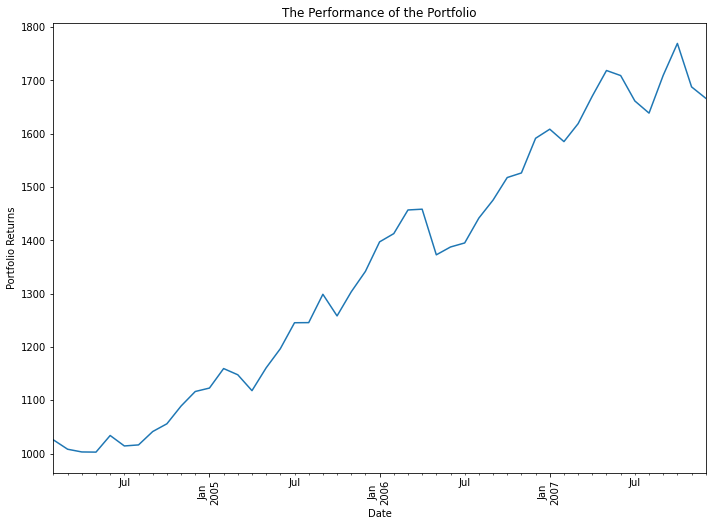

In [67]:
# Use matplotlib.figure() function to control the default spacing of the subplots and the top level container of the subplots,
# and the top level container for all plot elements.
plt.figure(figsize=[ 11.69, 8.27])

# Use matplotlib.pyplot.title() to set a title for the axes.
plt.title('The Performance of the Portfolio');

# Use matplotlib.pyplot.xlabel to set the label for the x-axis.
plt.xlabel('Date');

# Use matplotlib.pyplot.ylabel to set the label for the y-axis.
plt.ylabel('Portfolio Returns');

# Use matplotlip.pyplot.plot() function to plot y versus x as lines and /or markers
equity_df_2['Portfolio_Value'].plot()

plt.xticks(rotation=90);
# Use matplotlib.pyplot.show() function to display all figures. 
plt.show();

In [68]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2.Portfolio_Value.max() - equity_df_2.Portfolio_Value.min()) / equity_df_2.Portfolio_Value.max()

0.4332116629065215

In [69]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2['Portfolio_Value'][-1] / equity_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 62.47%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [70]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2['Monthly_Return'] = equity_df_2['Portfolio_Value'].pct_change(1)

In [71]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2['Monthly_Return'].mean() / equity_df_2['Monthly_Return'].std()
Sharpe_Ratio

0.4288332552643525

In [72]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(46)
Annualized_Sharpe_Ratio

2.90848864494063

In [73]:
# Calcualte the Sharpe Ratio
RF = .0164 # Risk Free Rate
Returns = equity_df_2['Monthly_Return']

Sharpe_Ratio = ((Returns.mean() - RF) / Returns.std())
Sharpe_Ratio

-0.21494185022561677

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 1.68 %.
- Maximum Drawdown 43.32%.
- Cumulative return of the o=portfolio 62.47%
- Sharpe Ratio - 4.2%.


In [74]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime

In [75]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df = pd.read_csv('Commodity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df.head()

(48, 12)


,Date,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
0,1/1/2004,402.2,33.05,1.70,5397,6246,75.50,276.25,389.00,11430,894.0,3132
1,2/1/2004,396.4,36.16,1.75,5416,6696,75.05,296.25,380.75,13430,835.2,3239
2,3/1/2004,427.3,35.76,1.72,5933,7936,73.75,320.00,408.00,13590,988.8,3148
3,4/1/2004,387.0,37.38,1.71,5862,5867,67.15,316.50,381.50,12100,909.7,3040
4,5/1/2004,394.0,39.88,1.87,6442,6105,85.55,304.00,362.00,12780,1010.1,3055


In [76]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         48 non-null     object 
 1   Gold         48 non-null     float64
 2   WTI          48 non-null     float64
 3   Heat_Oil     48 non-null     float64
 4   Natural_Gas  48 non-null     int64  
 5   Silver       48 non-null     int64  
 6   US_Coffee    48 non-null     float64
 7   US_Corn      48 non-null     float64
 8   Wheat        48 non-null     float64
 9   Copper       48 non-null     int64  
 10  Platinum     48 non-null     float64
 11  Cocoa        48 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 4.6+ KB


In [77]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df['Date'] = pd.to_datetime(commodity_df.Date)

In [78]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df['Natural_Gas'] = commodity_df['Natural_Gas'].astype(float)
commodity_df['Silver'] = commodity_df['Silver'].astype(float)
commodity_df['Copper'] = commodity_df['Copper'].astype(float)
commodity_df['Cocoa'] = commodity_df['Cocoa'].astype(float)

In [79]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Gold         48 non-null     float64       
 2   WTI          48 non-null     float64       
 3   Heat_Oil     48 non-null     float64       
 4   Natural_Gas  48 non-null     float64       
 5   Silver       48 non-null     float64       
 6   US_Coffee    48 non-null     float64       
 7   US_Corn      48 non-null     float64       
 8   Wheat        48 non-null     float64       
 9   Copper       48 non-null     float64       
 10  Platinum     48 non-null     float64       
 11  Cocoa        48 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 KB


In [80]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df.set_index('Date',inplace=True)

In [81]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [82]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df = commodity_df[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee','US_Corn','Wheat','Copper',
                             'Platinum','Cocoa']].pct_change()
commodity_df

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,-0.014421,0.094100,0.029412,0.003520,0.072046,-0.005960,0.072398,-0.021208,0.174978,-0.065772,0.034163
2004-03-01,0.077952,-0.011062,-0.017143,0.095458,0.185185,-0.017322,0.080169,0.071569,0.011914,0.183908,-0.028095
2004-04-01,-0.094313,0.045302,-0.005814,-0.011967,-0.260711,-0.089492,-0.010938,-0.064951,-0.109639,-0.079996,-0.034307
2004-05-01,0.018088,0.066881,0.093567,0.098942,0.040566,0.274013,-0.039494,-0.051114,0.056198,0.110366,0.004934
2004-06-01,-0.003553,-0.070963,-0.037433,-0.044551,-0.053890,-0.145529,-0.152961,-0.066298,-0.057121,-0.024849,0.038298
2004-07-01,-0.004075,0.182186,0.138889,-0.006986,0.134003,-0.090971,-0.156311,-0.076183,0.085477,0.095330,0.004729
2004-08-01,0.049616,-0.038356,0.019512,-0.169830,0.033740,0.042889,0.048331,-0.008006,-0.020642,0.030865,-0.037967
2004-09-01,0.020224,0.178538,0.014354,0.339180,0.021415,0.188312,-0.097695,-0.009685,0.092896,0.030210,-0.049576


In [83]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df.dropna(axis=0, inplace=True)
commodity_df

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2004-02-01,-0.014421,0.094100,0.029412,0.003520,0.072046,-0.005960,0.072398,-0.021208,0.174978,-0.065772,0.034163
2004-03-01,0.077952,-0.011062,-0.017143,0.095458,0.185185,-0.017322,0.080169,0.071569,0.011914,0.183908,-0.028095
2004-04-01,-0.094313,0.045302,-0.005814,-0.011967,-0.260711,-0.089492,-0.010938,-0.064951,-0.109639,-0.079996,-0.034307
2004-05-01,0.018088,0.066881,0.093567,0.098942,0.040566,0.274013,-0.039494,-0.051114,0.056198,0.110366,0.004934
2004-06-01,-0.003553,-0.070963,-0.037433,-0.044551,-0.053890,-0.145529,-0.152961,-0.066298,-0.057121,-0.024849,0.038298
2004-07-01,-0.004075,0.182186,0.138889,-0.006986,0.134003,-0.090971,-0.156311,-0.076183,0.085477,0.095330,0.004729
2004-08-01,0.049616,-0.038356,0.019512,-0.169830,0.033740,0.042889,0.048331,-0.008006,-0.020642,0.030865,-0.037967
2004-09-01,0.020224,0.178538,0.014354,0.339180,0.021415,0.188312,-0.097695,-0.009685,0.092896,0.030210,-0.049576
2004-10-01,0.023406,0.042707,-0.075472,0.284032,0.054367,-0.096539,-0.014599,0.031785,-0.037857,-0.002793,-0.077557


In [84]:
print('There are {} rows in the DataFrame'.format(commodity_df.shape[0]))

There are 47 rows in the DataFrame


In [85]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
commodity_df_2 = commodity_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (commodity_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus one month (null value) equal 47 months.

In [86]:
vol_com_df = commodity_df

In [87]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df['Gold_Vol'] = vol_com_df['Gold'].rolling(47).std() * math.sqrt(47)
vol_com_df['WTI_Vol'] = vol_com_df['WTI'].rolling(47).std() * math.sqrt(47)
vol_com_df['Heat_Oil_Vol'] = vol_com_df['Heat_Oil'].rolling(47).std() * math.sqrt(47)
vol_com_df['Natural_Gas_Vol'] = vol_com_df['Natural_Gas'].rolling(47).std() * math.sqrt(47)
vol_com_df['Silver_Vol'] = vol_com_df['Silver'].rolling(47).std() * math.sqrt(47)
vol_com_df['US_Coffee_Vol'] = vol_com_df['US_Coffee'].rolling(47).std() * math.sqrt(47)
vol_com_df['US_Corn_Vol'] = vol_com_df['US_Corn'].rolling(47).std() * math.sqrt(47)
vol_com_df['Wheat_Vol'] = vol_com_df['Wheat'].rolling(47).std() * math.sqrt(47)
vol_com_df['Copper_Vol'] = vol_com_df['Copper'].rolling(47).std() * math.sqrt(47)
vol_com_df['Platinum_Vol'] = vol_com_df['Platinum'].rolling(47).std() * math.sqrt(47)
vol_com_df['Cocoa_Vol'] = vol_com_df['Cocoa'].rolling(47).std() * math.sqrt(47)

In [88]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df.dropna(axis=0, inplace=True)

In [89]:
vol_com_df[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
           'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

,Gold_Vol,WTI_Vol,Heat_Oil_Vol,Natural_Gas_Vol,Silver_Vol,US_Coffee_Vol,US_Corn_Vol,Wheat_Vol,Copper_Vol,Platinum_Vol,Cocoa_Vol
Date,,,,,,,,,,,
2007-12-01,0.306134,0.554422,0.394152,1.194513,0.630244,0.630225,0.61633,0.577043,0.571878,0.401136,0.358956


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [90]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.306134+0.554422+0.394152+1.194513+0.630244+0.630225+0.61633+0.577043+0.571878+0.401136+0.358956) / 11
volatility_com

0.5668211818181818

In [91]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 0.5668211818181818 / 11
commodity_target_vol

0.05152919834710743

In [92]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
commodity_portfolio_df = equity_df

In [93]:
commodity_portfolio_df['Gold_Alloc'] = commodity_target_vol / vol_com_df['Gold_Vol']
commodity_portfolio_df['WTI_Alloc'] = commodity_target_vol / vol_com_df['WTI_Vol']
commodity_portfolio_df['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df['Heat_Oil_Vol']
commodity_portfolio_df['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df['Natural_Gas_Vol']
commodity_portfolio_df['Silver_Alloc'] = commodity_target_vol / vol_com_df['Silver_Vol']
commodity_portfolio_df['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df['US_Coffee_Vol']
commodity_portfolio_df['US_Corn_Alloc'] = commodity_target_vol / vol_com_df['US_Corn_Vol']
commodity_portfolio_df['Wheat_Alloc'] = commodity_target_vol / vol_com_df['Wheat_Vol']
commodity_portfolio_df['Copper_Alloc'] = commodity_target_vol / vol_com_df['Copper_Vol']
commodity_portfolio_df['Platinum_Alloc'] = commodity_target_vol / vol_com_df['Platinum_Vol']
commodity_portfolio_df['Cocoa_Alloc'] = commodity_target_vol / vol_com_df['Cocoa_Vol']

In [94]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
commodity_portfolio_df.dropna(axis=0, inplace=True)

In [95]:
commodity_portfolio_df[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

,Gold_Alloc,WTI_Alloc,Heat_Oil_Alloc,Natural_Gas_Alloc,Silver_Alloc,US_Coffee_Alloc,US_Corn_Alloc,Wheat_Alloc,Copper_Alloc,Platinum_Alloc,Cocoa_Alloc
Date,,,,,,,,,,,
2007-12-01,0.168322,0.092942,0.130734,0.043138,0.081761,0.081763,0.083607,0.089299,0.090105,0.128458,0.143553


In [96]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [97]:
commodity_df_2['Gold_R'] = commodity_df_2['Gold'] * 0.168322
commodity_df_2['WTI_R'] = commodity_df_2['WTI'] * 0.092942
commodity_df_2['Heat_Oil_R'] = commodity_df_2['Heat_Oil'] * 0.130734
commodity_df_2['Natural_Gas_R'] = commodity_df_2['Natural_Gas'] * 0.043138
commodity_df_2['Silver_R'] = commodity_df_2['Silver'] * 0.081761
commodity_df_2['US_Coffee_R'] = commodity_df_2['US_Coffee'] * 0.081763
commodity_df_2['US_Corn_R'] = commodity_df_2['US_Corn'] * 0.083607
commodity_df_2['Wheat_R'] = commodity_df_2['Wheat'] * 0.089299
commodity_df_2['Copper_R'] = commodity_df_2['Copper'] * 0.090105
commodity_df_2['Platinum_R'] = commodity_df_2['Platinum'] * 0.128458
commodity_df_2['Cocoa_R'] = commodity_df_2['Cocoa'] * 0.143553

In [98]:
commodity_df_2

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,...,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,-0.014421,0.094100,0.029412,0.003520,0.072046,-0.005960,0.072398,-0.021208,0.174978,-0.065772,...,0.008746,0.003845,0.000152,0.005891,-0.000487,0.006053,-0.001894,0.015766,-0.008449,0.004904
2004-03-01,0.077952,-0.011062,-0.017143,0.095458,0.185185,-0.017322,0.080169,0.071569,0.011914,0.183908,...,-0.001028,-0.002241,0.004118,0.015141,-0.001416,0.006703,0.006391,0.001073,0.023624,-0.004033
2004-04-01,-0.094313,0.045302,-0.005814,-0.011967,-0.260711,-0.089492,-0.010938,-0.064951,-0.109639,-0.079996,...,0.004210,-0.000760,-0.000516,-0.021316,-0.007317,-0.000914,-0.005800,-0.009879,-0.010276,-0.004925
2004-05-01,0.018088,0.066881,0.093567,0.098942,0.040566,0.274013,-0.039494,-0.051114,0.056198,0.110366,...,0.006216,0.012232,0.004268,0.003317,0.022404,-0.003302,-0.004564,0.005064,0.014177,0.000708
2004-06-01,-0.003553,-0.070963,-0.037433,-0.044551,-0.053890,-0.145529,-0.152961,-0.066298,-0.057121,-0.024849,...,-0.006595,-0.004894,-0.001922,-0.004406,-0.011899,-0.012789,-0.005920,-0.005147,-0.003192,0.005498
2004-07-01,-0.004075,0.182186,0.138889,-0.006986,0.134003,-0.090971,-0.156311,-0.076183,0.085477,0.095330,...,0.016933,0.018157,-0.000301,0.010956,-0.007438,-0.013069,-0.006803,0.007702,0.012246,0.000679
2004-08-01,0.049616,-0.038356,0.019512,-0.169830,0.033740,0.042889,0.048331,-0.008006,-0.020642,0.030865,...,-0.003565,0.002551,-0.007326,0.002759,0.003507,0.004041,-0.000715,-0.001860,0.003965,-0.005450
2004-09-01,0.020224,0.178538,0.014354,0.339180,0.021415,0.188312,-0.097695,-0.009685,0.092896,0.030210,...,0.016594,0.001877,0.014632,0.001751,0.015397,-0.008168,-0.000865,0.008370,0.003881,-0.007117
2004-10-01,0.023406,0.042707,-0.075472,0.284032,0.054367,-0.096539,-0.014599,0.031785,-0.037857,-0.002793,...,0.003969,-0.009867,0.012253,0.004445,-0.007893,-0.001221,0.002838,-0.003411,-0.000359,-0.011133


In [99]:
# Adding up all the returns of all asset classes for all commodities

In [100]:
commodity_df_2['Portfolio_R'] = commodity_df_2['Gold_R'] + commodity_df_2['WTI_R'] + commodity_df_2['Heat_Oil_R'] + commodity_df_2['Natural_Gas_R'] + commodity_df_2['Silver_R'] + commodity_df_2['US_Coffee_R'] + commodity_df_2['US_Corn_R'] + commodity_df_2['Wheat_R'] + commodity_df_2['Copper_R'] + commodity_df_2['Platinum_R'] + commodity_df_2['Cocoa_R']

In [101]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [102]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2['Portfolio_Value'] = ((commodity_df_2['Portfolio_R'] + 1).cumprod())*1000

In [103]:
commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Portfolio_Value']]

,Gold_R,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R,Portfolio_R,Portfolio_Value
Date,,,,,,,,,,,,,
2004-02-01,-0.002427,0.008746,0.003845,0.000152,0.005891,-0.000487,0.006053,-0.001894,0.015766,-0.008449,0.004904,0.032100,1032.099606
2004-03-01,0.013121,-0.001028,-0.002241,0.004118,0.015141,-0.001416,0.006703,0.006391,0.001073,0.023624,-0.004033,0.061453,1095.524950
2004-04-01,-0.015875,0.004210,-0.000760,-0.000516,-0.021316,-0.007317,-0.000914,-0.005800,-0.009879,-0.010276,-0.004925,-0.073369,1015.147901
2004-05-01,0.003045,0.006216,0.012232,0.004268,0.003317,0.022404,-0.003302,-0.004564,0.005064,0.014177,0.000708,0.063565,1079.675877
2004-06-01,-0.000598,-0.006595,-0.004894,-0.001922,-0.004406,-0.011899,-0.012789,-0.005920,-0.005147,-0.003192,0.005498,-0.051864,1023.679299
2004-07-01,-0.000686,0.016933,0.018157,-0.000301,0.010956,-0.007438,-0.013069,-0.006803,0.007702,0.012246,0.000679,0.038376,1062.963923
2004-08-01,0.008352,-0.003565,0.002551,-0.007326,0.002759,0.003507,0.004041,-0.000715,-0.001860,0.003965,-0.005450,0.006257,1069.615246
2004-09-01,0.003404,0.016594,0.001877,0.014632,0.001751,0.015397,-0.008168,-0.000865,0.008370,0.003881,-0.007117,0.049755,1122.834265
2004-10-01,0.003940,0.003969,-0.009867,0.012253,0.004445,-0.007893,-0.001221,0.002838,-0.003411,-0.000359,-0.011133,-0.006439,1115.604441


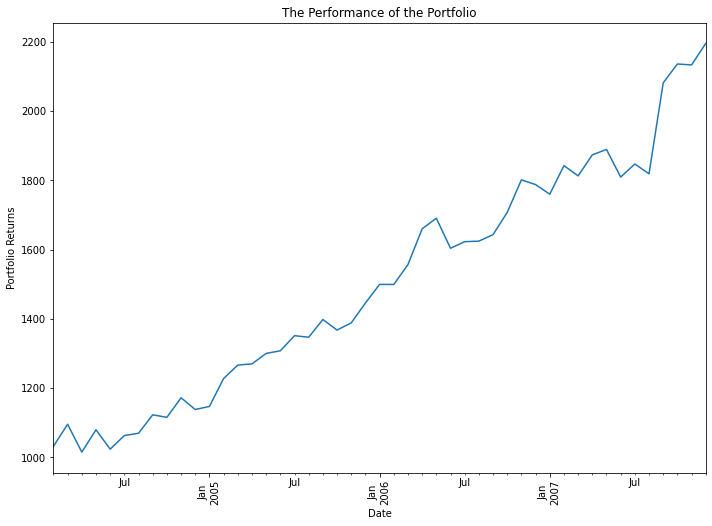

In [104]:
# Use matplotlib.figure() function to control the default spacing of the subplots and the top level container of the subplots,
# and the top level container for all plot elements.
plt.figure(figsize=[ 11.69, 8.27])

# Use matplotlib.pyplot.title() to set a title for the axes.
plt.title('The Performance of the Portfolio');

# Use matplotlib.pyplot.xlabel to set the label for the x-axis.
plt.xlabel('Date');

# Use matplotlib.pyplot.ylabel to set the label for the y-axis.
plt.ylabel('Portfolio Returns');

# Use matplotlip.pyplot.plot() function to plot y versus x as lines and /or markers
commodity_df_2['Portfolio_Value'].plot()

plt.xticks(rotation=90);
# Use matplotlib.pyplot.show() function to display all figures. 
plt.show();

In [105]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2.Portfolio_Value.max() - commodity_df_2.Portfolio_Value.min()) / commodity_df_2.Portfolio_Value.max()

0.5375645448133122

In [106]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2['Portfolio_Value'][-1] / commodity_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 112.69%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [107]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2['Monthly_Return'] = commodity_df_2['Portfolio_Value'].pct_change(1)

In [108]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2['Monthly_Return'].mean() / commodity_df_2['Monthly_Return'].std()
Sharpe_Ratio

0.45312945214623523

In [109]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

3.106499013183542

In [110]:
# Calcualte the Sharpe Ratio
RF = .0164 # Risk Free Rate
Returns = commodity_df_2['Monthly_Return']

Sharpe_Ratio = ((Returns.mean() - RF) / Returns.std())
Sharpe_Ratio

0.02191052754896859

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 5.15 %.
- Maximum Drawdown 5.37%.
- Cumulative return of the o=portfolio 112.69%
- Sharpe Ratio 4.53%.
